<a href="https://colab.research.google.com/github/nanditanarendar/Pulsar_Glitches_Thesis/blob/main/SpinvsTime_Vela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# -----------------------------
# Time array (MJD)
# -----------------------------
t_start = 58000
t_end   = 59000
t = np.linspace(t_start, t_end, 6000)
sec_per_day = 86400.0

# -----------------------------
# Secular timing parameters
# -----------------------------
F0 = 11.19          # Hz
F1 = -1.6e-11       # Hz/s
F2 = 0.0            # Hz/s^2 (often negligible)
t0 = 58000.0        # reference epoch (MJD)

dt_sec = (t - t0) * sec_per_day

nu_secular = (
    F0
    + F1 * dt_sec
    + 0.5 * F2 * dt_sec**2
)

In [3]:
def glitch_nu(
    t,
    tg,
    delta_nu_total,
    Q,
    delta_nudot_p=0.0,
    tau_days=None
):
    """
    ATNF-style glitch frequency contribution.

    Parameters
    ----------
    t : array
        Time array (MJD)
    tg : float
        Glitch epoch (MJD)
    delta_nu_total : float
        Total frequency jump Δν_total (Hz)
    Q : float
        Recovery fraction
    delta_nudot_p : float
        Permanent jump in spin-down rate Δνdot_p (Hz/s)
    tau_days : float or None
        Recovery timescale Td (days). If None, no exponential recovery.

    Returns
    -------
    Δν_g(t) : array
        Glitch-induced frequency change (Hz)
    """

    H = np.heaviside(t - tg, 0.0)
    dt_sec = (t - tg) * sec_per_day

    # Permanent components
    delta_nu_p = (1.0 - Q) * delta_nu_total
    nu_g = delta_nu_p + delta_nudot_p * dt_sec

    # Transient recovery
    if tau_days is not None and Q > 0.0:
        nu_g += Q * delta_nu_total * np.exp(-(t - tg) / tau_days)

    return H * nu_g

In [4]:
# -----------------------------
# Glitch 1 (example)
# -----------------------------
g1 = {
    "tg": 58300.0,
    "delta_nu_total": 2.5e-5,   # Hz
    "Q": 0.30,
    "delta_nudot_p": -5.0e-14,  # Hz/s
    "tau_days": 30.0
}

# -----------------------------
# Glitch 2 (example)
# -----------------------------
g2 = {
    "tg": 58750.0,
    "delta_nu_total": 1.8e-5,
    "Q": 0.15,
    "delta_nudot_p": -3.0e-14,
    "tau_days": 50.0
}

In [5]:
delta_nu_total = (
    glitch_nu(t, **g1)
    + glitch_nu(t, **g2)
)

nu_total = nu_secular + delta_nu_total

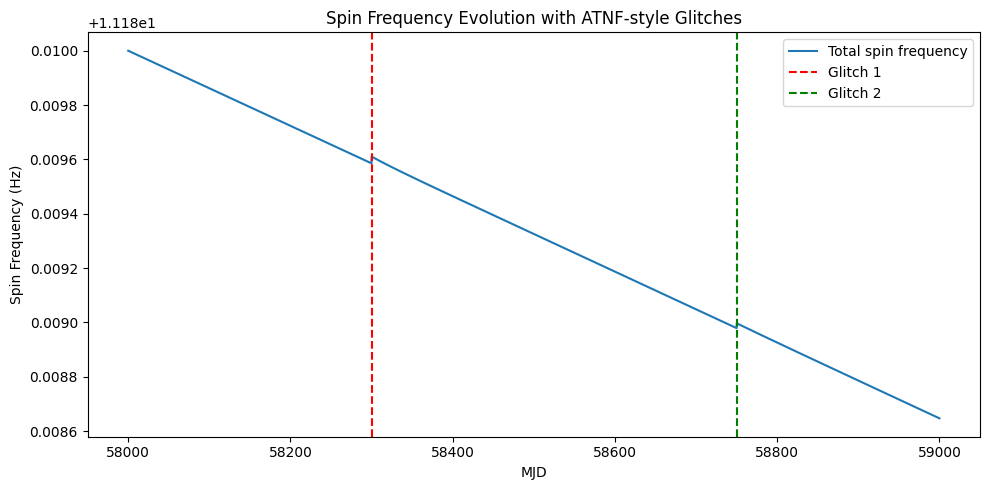

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(t, nu_total, label="Total spin frequency")
plt.axvline(g1["tg"], color="r", linestyle="--", label="Glitch 1")
plt.axvline(g2["tg"], color="g", linestyle="--", label="Glitch 2")

plt.xlabel("MJD")
plt.ylabel("Spin Frequency (Hz)")
plt.title("Spin Frequency Evolution with ATNF-style Glitches")
plt.legend()
plt.tight_layout()
plt.show()